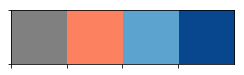

In [1]:
import random
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.patches import Circle
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')
from PIL import Image
import numpy as np
from scipy.misc import comb
from math import log, exp, sqrt
from collections import Counter, OrderedDict
import seaborn as sns
sns.set_context("paper")
# sns.set_context('talk')
import string
import json
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# COLORS = ["#808080", "#3498db", "#0000b3", "#ffd480", "#e74c3c"]
blues = sns.color_palette('Blues', 10)
reds = sns.color_palette('Reds')
COLORS = ["#808080", reds[2], blues[5], blues[9]]
sns.palplot(sns.color_palette(COLORS))


### Hamming tau

In [2]:
def distrib(m, v, tau=0.7):
    x = [comb(m, d, exact=False) * (v-1)**d / v**m * exp(-d/tau) for d in range(m+1)]
    x = np.array(x)
    x/= np.sum(x)
    return x

def distrib2(m, v, tau=0.7):
    x = [comb(m, d, exact=False) * (v-1)**d * exp(-d/tau) / (((v-1) * exp(-1/tau)+1) ** m) for d in range(m+1)]
    x = np.array(x)
    x/= np.sum(x)
    return x

In [4]:
def plot_bar_dist(ax, m, V, taus):
    h = .3
    ticks = [ h*i for i in range(len(taus))]
#     clr = sns.color_palette('Blues', 17)
    clr = sns.color_palette("coolwarm", 17)
    r = []
    for tau in taus:
        dd = distrib2(m,V,tau)
        r.append(dd)
    r = np.array(r).T
    r = np.vstack((np.zeros(len(taus),), r))
    cr = np.cumsum(r, axis=0)
    for d in range(1,m+1):
    #     print(r[d])
        ax.barh(ticks, r[d], left=cr[d-1], color=clr[d], height=h)
        for row in range(len(taus)):
            if r[d, row] > 3.2e-2:
                ax.annotate(d, xy=(cr[d-1, row] + r[d, row]/2 , h * row),
                           fontsize=12)
    #                         xytext=(cr[d-1, row] + r[d, row]/3 , row))

    ax.set_yticks(ticks)
    ax.set_yticklabels(['%.2f'%tau for tau in taus])
    ax.set_title(r'$V_{sub} = %d$' % V)
    ax.set_ylabel(r'$\tau$', rotation=0)
    ax.yaxis.set_label_coords(-0.02,0.98)

In [5]:
def plot_bar_dist_vertical(ax, m, V, taus):
    h = .3
    ticks = [ h*i for i in range(len(taus))]
#     clr = sns.color_palette('Blues', 17)
    clr = sns.color_palette("coolwarm", 17)
    r = []
    for tau in taus:
        dd = distrib2(m,V,tau)
        r.append(dd)
    r = np.array(r).T
    r = np.vstack((np.zeros(len(taus),), r))
    cr = np.cumsum(r, axis=0)
    for d in range(1,m+1):
    #     print(r[d])
        ax.bar(ticks, r[d], bottom=cr[d-1], color=clr[d], width=h)
        for row in range(len(taus)):
            if r[d, row] > 3.2e-2:
                ax.annotate(d, xy=(h*row, cr[d-1, row] + r[d, row]/2),
                           fontsize=12)
    #                         xytext=(cr[d-1, row] + r[d, row]/3 , row))

    ax.set_xticks(ticks)
    ax.set_xticklabels(['%.2f'%tau for tau in taus])
    ax.set_title(r'$V_{sub} = %d$' % V)
    ax.set_xlabel(r'$\tau$', rotation=0)
#     ax.xaxis.set_label_coords(0,0)

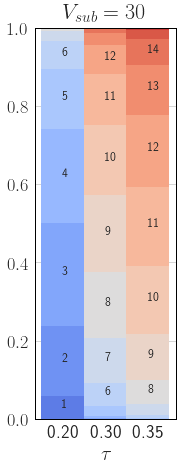

In [6]:
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'black'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})


f, axs = plt.subplots(1,1, figsize=(3, 7))
plot_bar_dist_vertical(axs, 16, 30, [.20, .30, .35])
# plot_bar_dist(axs[1], 16, 210, [.1, .15, .2])
# plot_bar_dist(axs[2], 16, 9800, [.08, .1, .12])
f.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.savefig('../figures/hamming_d_distrib_short.png', dpi=400, bbox_inches='tight')

In [7]:
def distrib_v(m, vs, tau=.1):
    vmass = [((v-1) * exp(-1/tau)+1) ** m for v in vs]
    vmass = [vm / vmass[-1] for vm in vmass]
    return vmass